<a href="https://colab.research.google.com/github/ashiqkareem/ict3204-coursework2/blob/main/ict3204_coursework2_analyser_gp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [20]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/ict3204-coursework2-pklfiles/ict3204-coursework2-df.pkl'

import pandas as pd

df = pd.read_pickle(dataset_path)
df.shape

(93495, 8)

# Preparing Dataset

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Feature Selection
X = df.iloc[:, 0:7]
y = df.iloc[:, 7]

In [4]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.4)

In [5]:
# Assigning list containing features used
feature_columns = ['destination.bytes', # keep
 'destination.port', # keep
 'event.duration', # keep
 'network.bytes', # keep
 'network.transport', # keep
 'source.bytes', # keep
 'source.port'# keep
]

In [6]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# K-Nearest Neighbour Algorithm

In [13]:
# Building KNN Model
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [14]:
# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.9898122894272421
Precision: 0.8297297297297297
Recall: 0.4912


In [15]:
# Generate the summary of the predictions (Classification Report) made by the classifier
print("Classification Report : \n\n")
print (classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     36773
         1.0       0.83      0.49      0.62       625

    accuracy                           0.99     37398
   macro avg       0.91      0.74      0.81     37398
weighted avg       0.99      0.99      0.99     37398



Text(91.68, 0.5, 'Predicted Outcome')

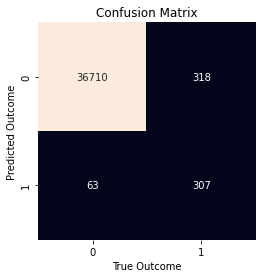

In [16]:
# Confusion Matrix generated
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')

# Optimizing KNN Performance

In [17]:
# Choosing the best K Value (using elbow method)
error_rate = []
test_accuracy = []

for i in range(1,100,1):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  test_accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy Rate')

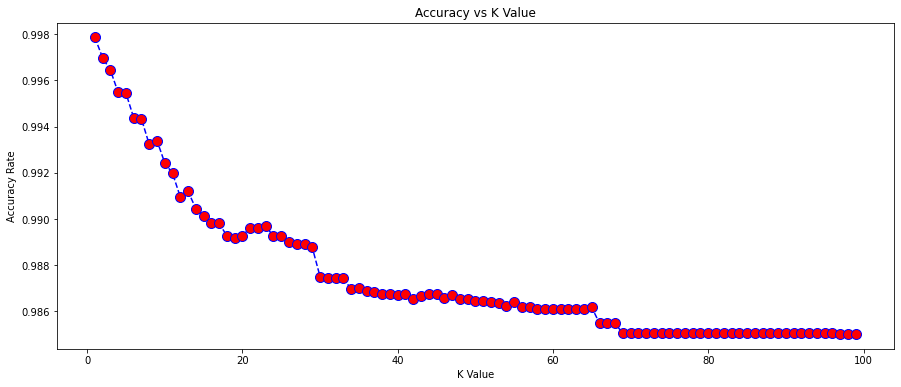

In [19]:
# Plotting graph depicting Error Rate vs K Value
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

In [ ]:
k_folds = KFold(n_splits = 5)

kfold = []
kvalue = []
kaccuracy = []

for i in range(1,100,1):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  test_accuracy.append(accuracy_score(y_test, pred_i))
  scores = cross_val_score(knn, X, y, cv = k_folds)
  kfold.append((i,scores.mean()))
  kvalue.append(i)
  kaccuracy.append(scores.mean())

Text(0, 0.5, 'K-Fold Accuracy')

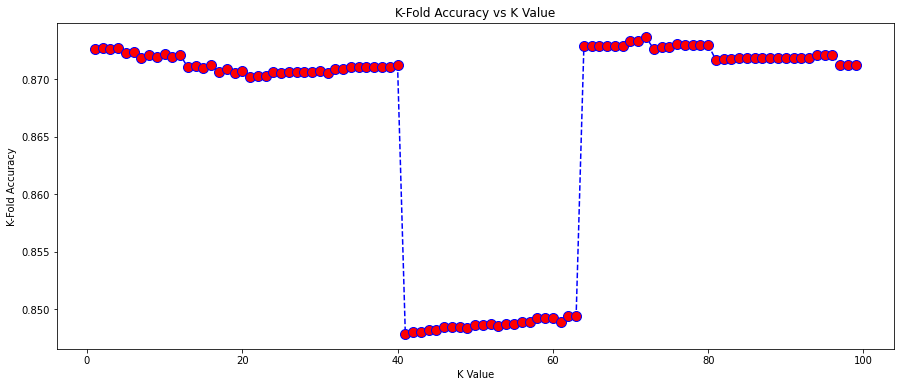

In [ ]:
# Plotting graph depicting Error Rate vs K Value
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(range(1,100), kaccuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('K-Fold Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('K-Fold Accuracy')

In [ ]:
for i in kfold:
  print(i)

(1, 0.8726242045029146)
(2, 0.8727525536124927)
(3, 0.8726028129846517)
(4, 0.8727204663350981)
(5, 0.8723033317289695)
(6, 0.8723568105246271)
(7, 0.8718861971228409)
(8, 0.8720894165463393)
(9, 0.8719289801593668)
(10, 0.872207069896786)
(11, 0.8719289801593668)
(12, 0.8721108080646024)
(13, 0.871019840633189)
(14, 0.8711802770201615)
(15, 0.8709877533557945)
(16, 0.8712444515749505)
(17, 0.8706027060270604)
(18, 0.8708807957644794)
(19, 0.8705599229905342)
(20, 0.8706775763409809)
(21, 0.8701855714209316)
(22, 0.8702604417348521)
(23, 0.8702390502165891)
(24, 0.8706668805818494)
(25, 0.8705813145087973)
(26, 0.8706668805818494)
(27, 0.8706668805818494)
(28, 0.8706668805818494)
(29, 0.8706454890635863)
(30, 0.8707096636183753)
(31, 0.8705599229905342)
(32, 0.8709235788010055)
(33, 0.8709235788010055)
(34, 0.8710733194288466)
(35, 0.8710733194288466)
(36, 0.8710947109471094)
(37, 0.8710305363923204)
(38, 0.8710305363923204)
(39, 0.8710305363923204)
(40, 0.871255147334082)
(41, 0.84785

# Decision Tree Algorithm

In [ ]:
# Building Decision Tree Model
dtClf = DecisionTreeClassifier()
dtClf = dtClf.fit(X_train, y_train)
y_pred = dtClf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.9994919514412536
Precision: 0.9902912621359223
Recall: 0.9792


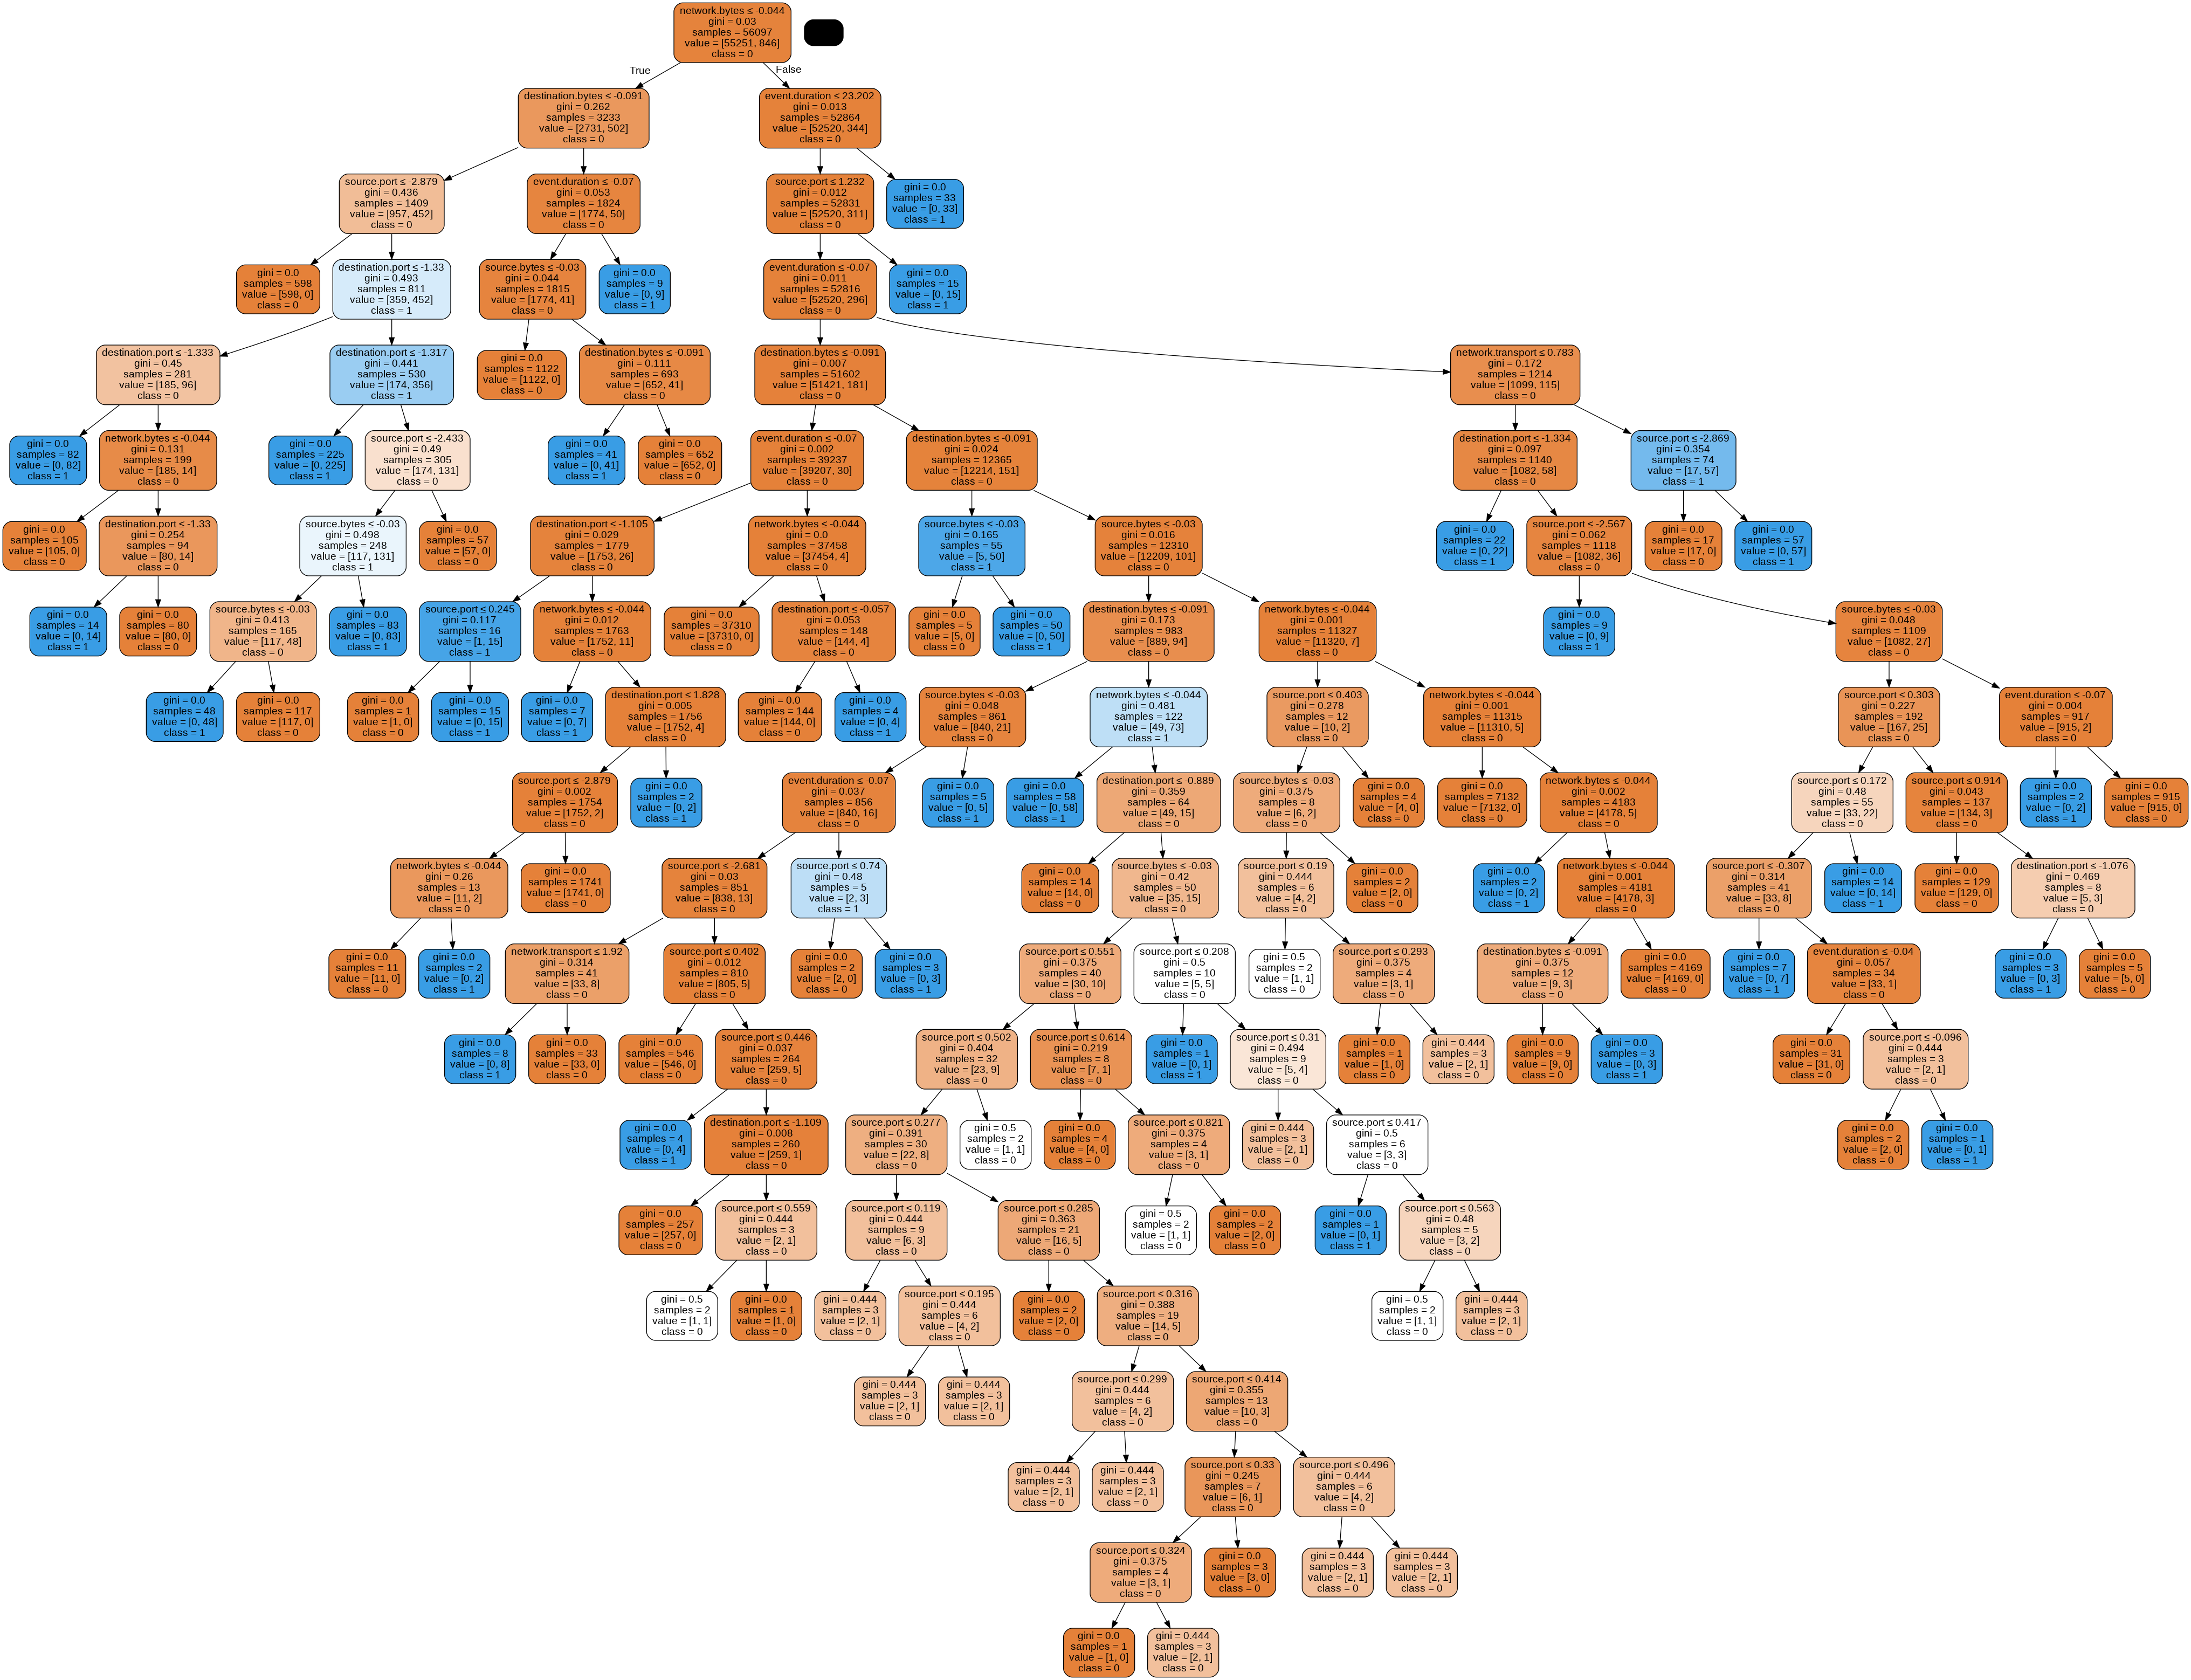

In [ ]:
# Plotting Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtClf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree - T1595.png')
Image(graph.create_png())

In [ ]:
# Looking at feature importance
feature_imp = pd.Series(dtClf.feature_importances_,index=feature_columns).sort_values(ascending=False)
feature_imp

destination.bytes    0.230896
source.port          0.225864
destination.port     0.203159
network.bytes        0.119239
source.bytes         0.102097
event.duration       0.067250
network.transport    0.051495
dtype: float64

In [ ]:
# Generate the summary of the predictions (Classification Report) made by the classifier
print("Classification Report : \n\n")
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     36773
         1.0       0.99      0.98      0.98       625

    accuracy                           1.00     37398
   macro avg       0.99      0.99      0.99     37398
weighted avg       1.00      1.00      1.00     37398



Text(91.68, 0.5, 'Predicted Outcome')

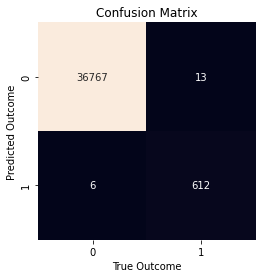

In [ ]:
# Confusion Matrix generated
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')

# Optimizing Decision Tree Performance

In [ ]:
optimized_dtClf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
optimized_dtClf = optimized_dtClf.fit(X_train, y_train)
optimized_y_pred = optimized_dtClf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy of optimized Decision Tree:",accuracy_score(y_test, optimized_y_pred))

Accuracy of optimized Decision Tree: 0.9865233434943045


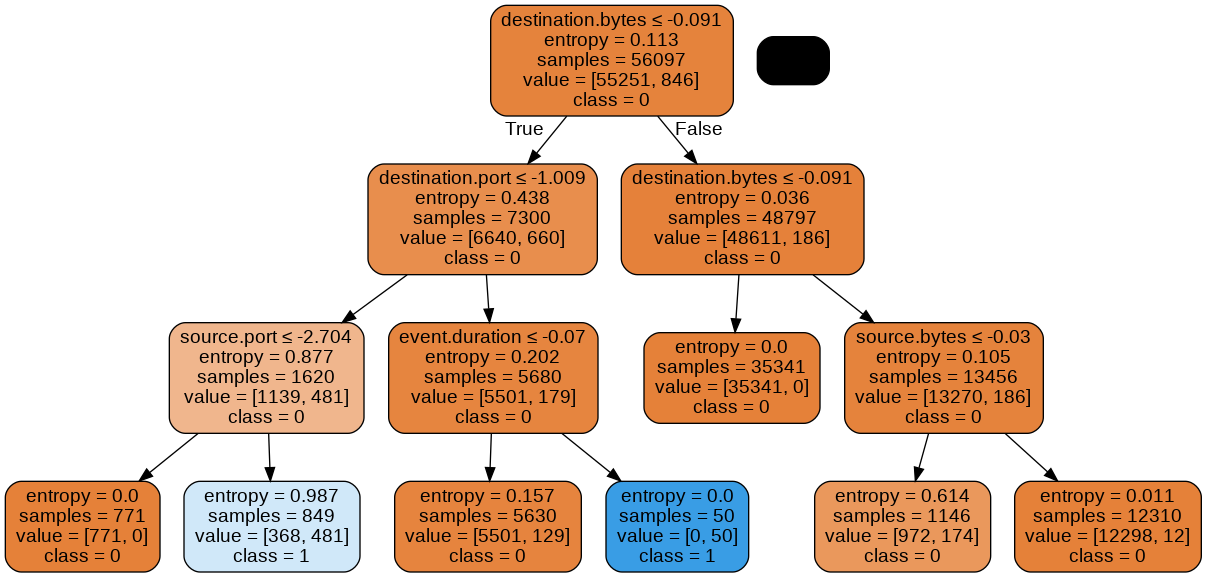

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(optimized_dtClf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree - T1595.png')
Image(graph.create_png())

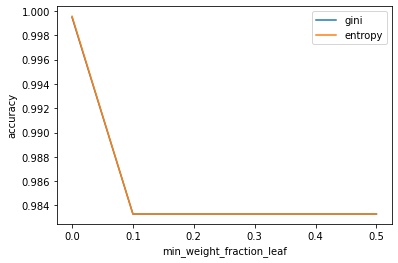

In [ ]:
fractions = [0,0.1,0.2,0.3,0.4,0.5]

min_weight_fraction_leaf = []
acc_gini = []
acc_entropy = []

for i in fractions:
  dtree = DecisionTreeClassifier(criterion='gini', min_weight_fraction_leaf=i )
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  acc_gini.append(accuracy_score(y_test, pred))
  ####
  dtree = DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=i)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  acc_entropy.append(accuracy_score(y_test, pred))
  ####
  min_weight_fraction_leaf.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
                  'acc_entropy':pd.Series(acc_entropy),
                  'min_weight_fraction_leaf':pd.Series(min_weight_fraction_leaf)})

# visualizing changes in parameters
plt.plot('min_weight_fraction_leaf','acc_gini', data=d, label='gini')
plt.plot('min_weight_fraction_leaf','acc_entropy', data=d, label='entropy')
plt.xlabel('min_weight_fraction_leaf')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
# min_weight_fraction_leaf = []
# acc_gini = []
# acc_entropy = []
acc_gini

[0.9994919514412536,
 0.9832878763570244,
 0.9832878763570244,
 0.9832878763570244,
 0.9832878763570244,
 0.9832878763570244]

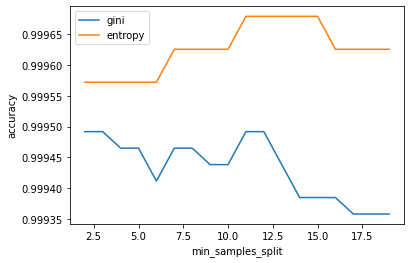

In [ ]:
min_samples_split = []
acc_gini = []
acc_entropy = []
for i in range(2,20,1):
 dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 min_samples_split.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_samples_split':pd.Series(min_samples_split)})
# visualizing changes in parameters
plt.plot('min_samples_split','acc_gini', data=d, label='gini')
plt.plot('min_samples_split','acc_entropy', data=d, label='entropy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()


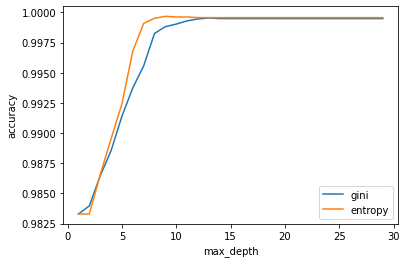

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i )
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_test_pred,y_test)}')
print(f'Test score {precision_score(y_test_pred,y_test)}')
print(f'Test score {recall_score(y_test_pred,y_test)}')

Train score 0.9994652120434248
Test score 0.9744
Test score 0.9934747145187602


In [ ]:
# Generate the summary of the predictions (Classification Report) made by the classifier
print("Classification Report : \n\n")
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     36773
         1.0       0.99      0.98      0.98       625

    accuracy                           1.00     37398
   macro avg       0.99      0.99      0.99     37398
weighted avg       1.00      1.00      1.00     37398



Text(91.68, 0.5, 'Predicted Outcome')

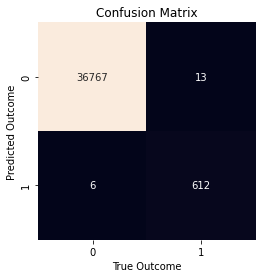

In [ ]:
# Confusion Matrix generated
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')

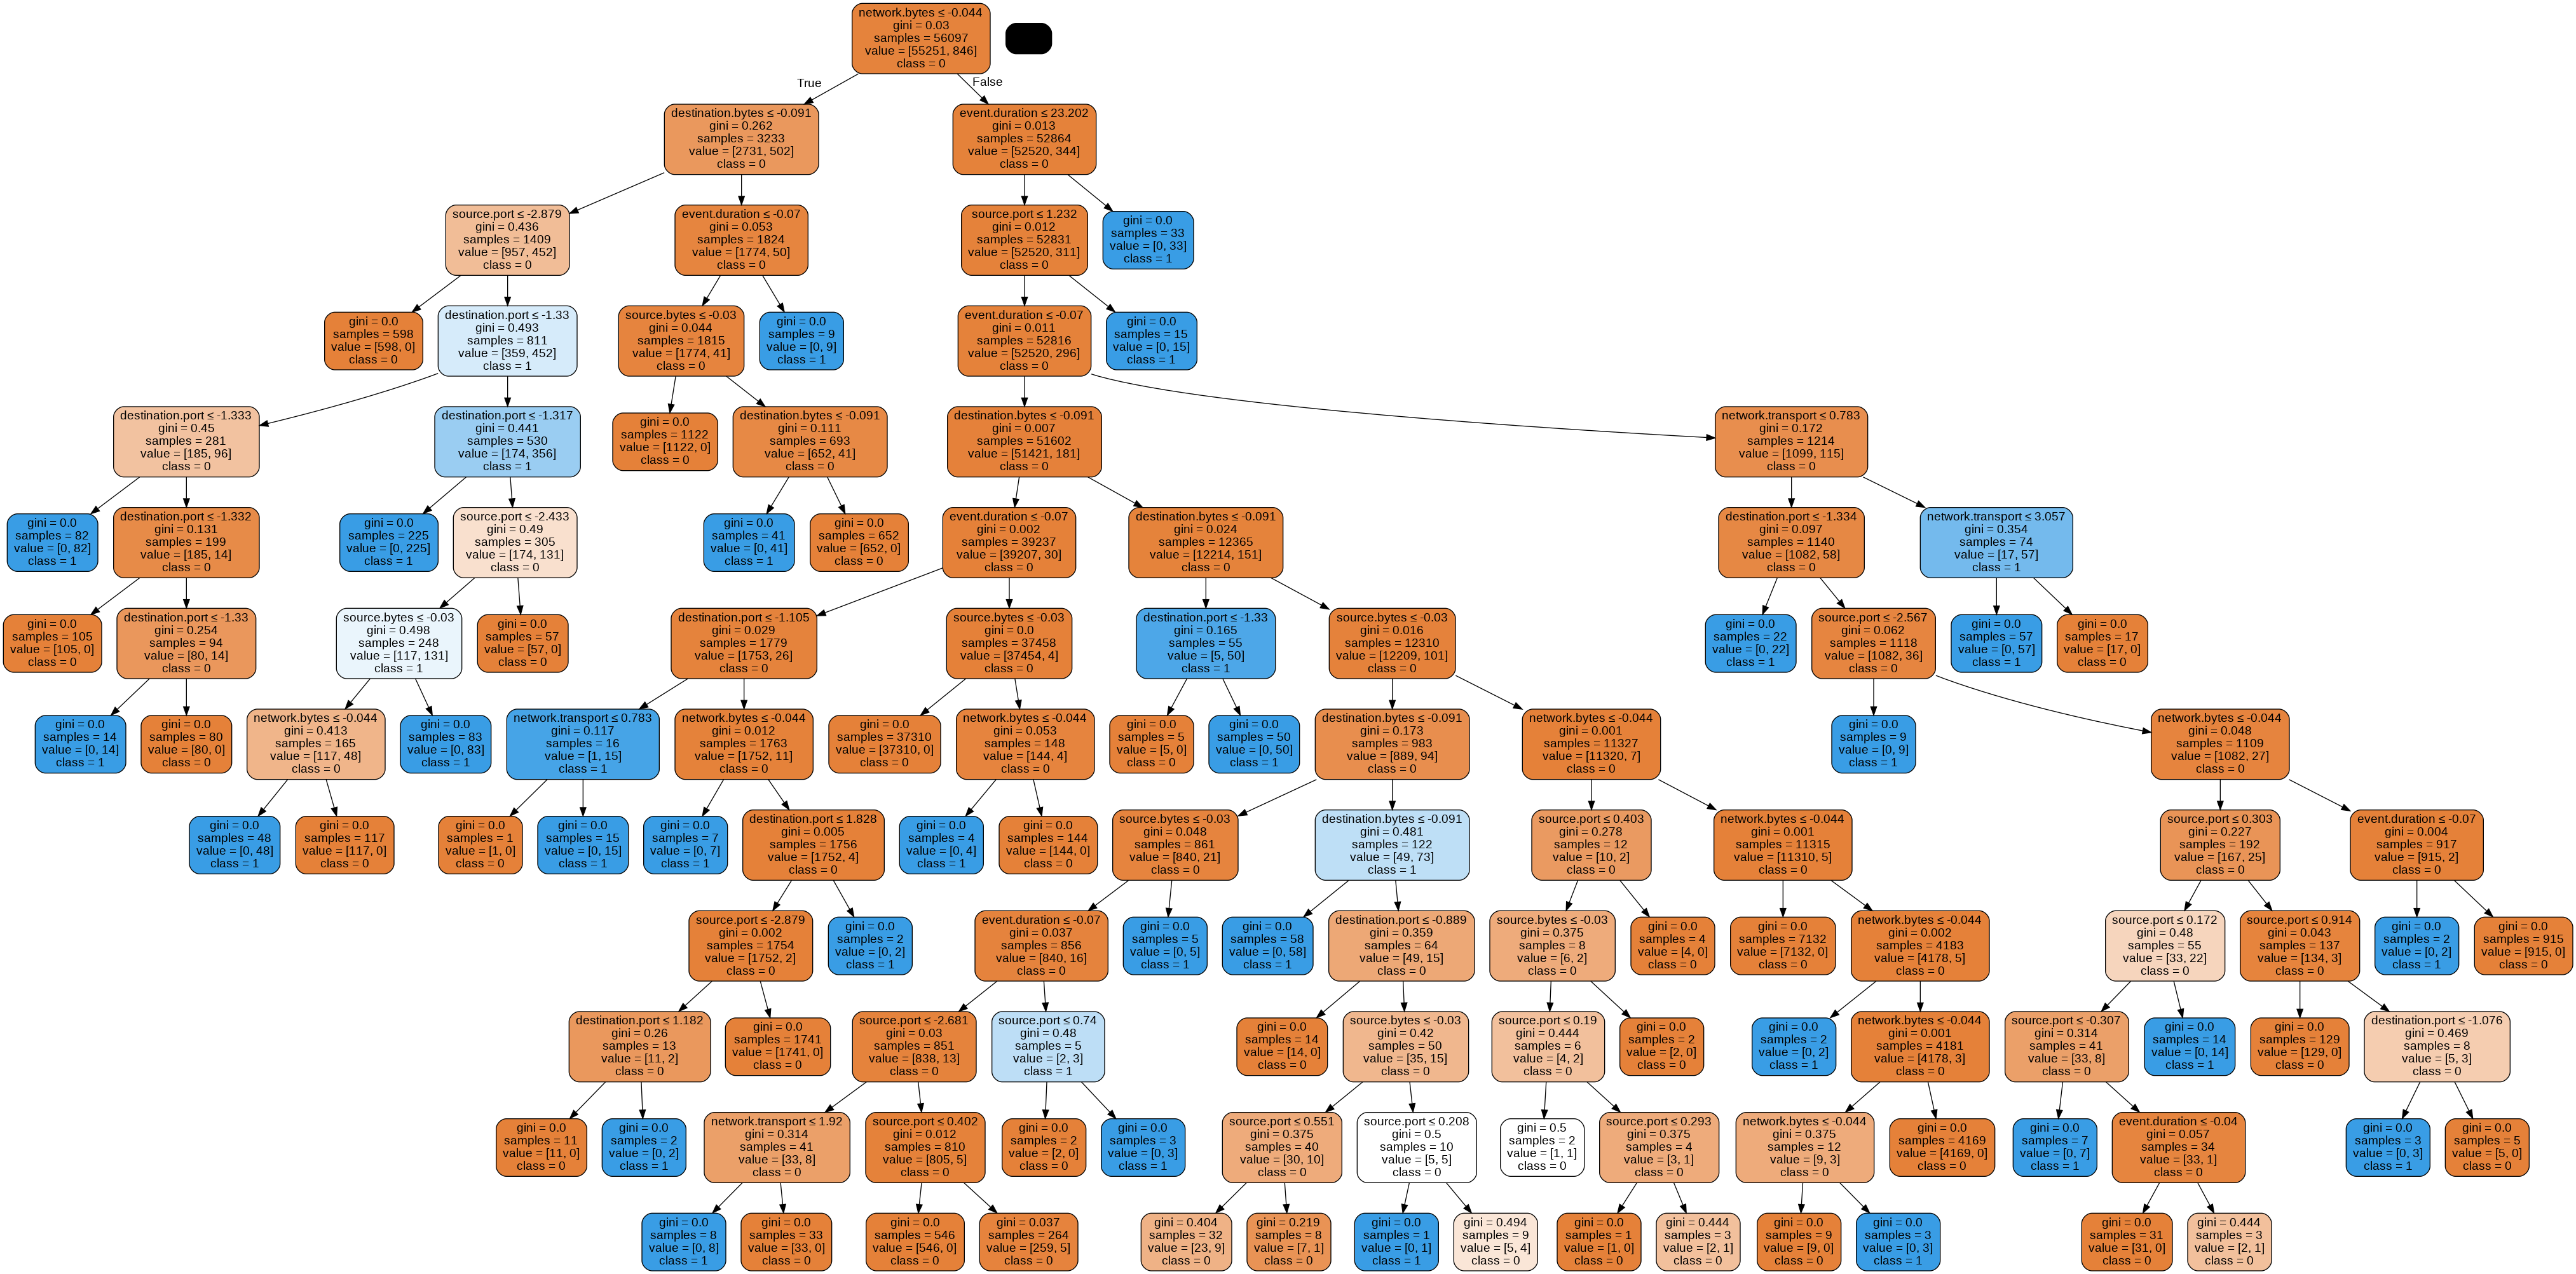

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree - T1595.png')
Image(graph.create_png())

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.35525272e-20 1.18841768e-06 2.97104420e-06 2.97104420e-06
 3.17953853e-06 3.25251155e-06 3.63952915e-06 5.94208841e-06
 5.94208841e-06 6.31346893e-06 6.33822763e-06 9.90348068e-06
 1.17470517e-05 1.73019633e-05 1.78262652e-05 3.34242473e-05
 3.50954597e-05 3.56118776e-05 3.79985196e-05 4.27830365e-05
 5.23077271e-05 7.08234301e-05 7.10615143e-05 7.11495428e-05
 7.12974465e-05 1.13277582e-04 1.62056957e-04 1.70664039e-04
 1.82203311e-04 2.32010186e-04 2.47445625e-04 2.51504049e-04
 3.02980055e-04 4.66855432e-04 5.77920221e-04 6.35873474e-04
 7.20478303e-04 7.62454077e-04 8.88157135e-04 1.16199666e-03
 1.33500122e-03 2.88508265e-03]


In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

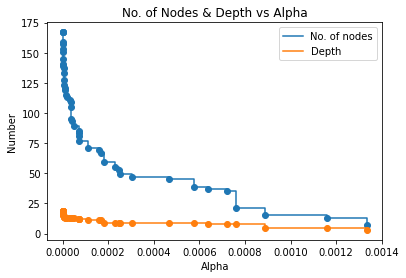

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='No. of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='Depth',drawstyle="steps-post")
plt.title('No. of Nodes & Depth vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Number')
plt.legend()
plt.show()

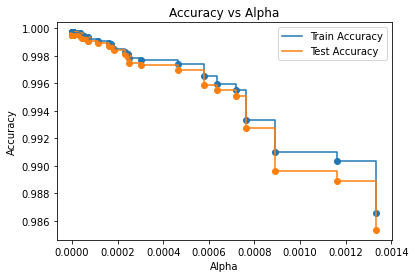

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='Train Accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='Test Accuracy',drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [ ]:
clf_ = DecisionTreeClassifier(random_state=100,ccp_alpha=0.0008)
clf_.fit(X_train, y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

In [ ]:
print(f'Train score {accuracy_score(y_test_pred,y_test)}')
print(f'Test score {precision_score(y_test_pred,y_test)}')
print(f'Test score {recall_score(y_test_pred,y_test)}')

Train score 0.9927803625862346
Test score 0.568
Test score 1.0


In [ ]:
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     37043
         1.0       0.57      1.00      0.72       355

    accuracy                           0.99     37398
   macro avg       0.78      1.00      0.86     37398
weighted avg       1.00      0.99      0.99     37398



Text(91.68, 0.5, 'Predicted Outcome')

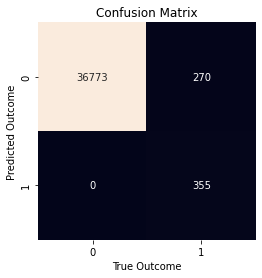

In [ ]:
# Confusion Matrix generated
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')

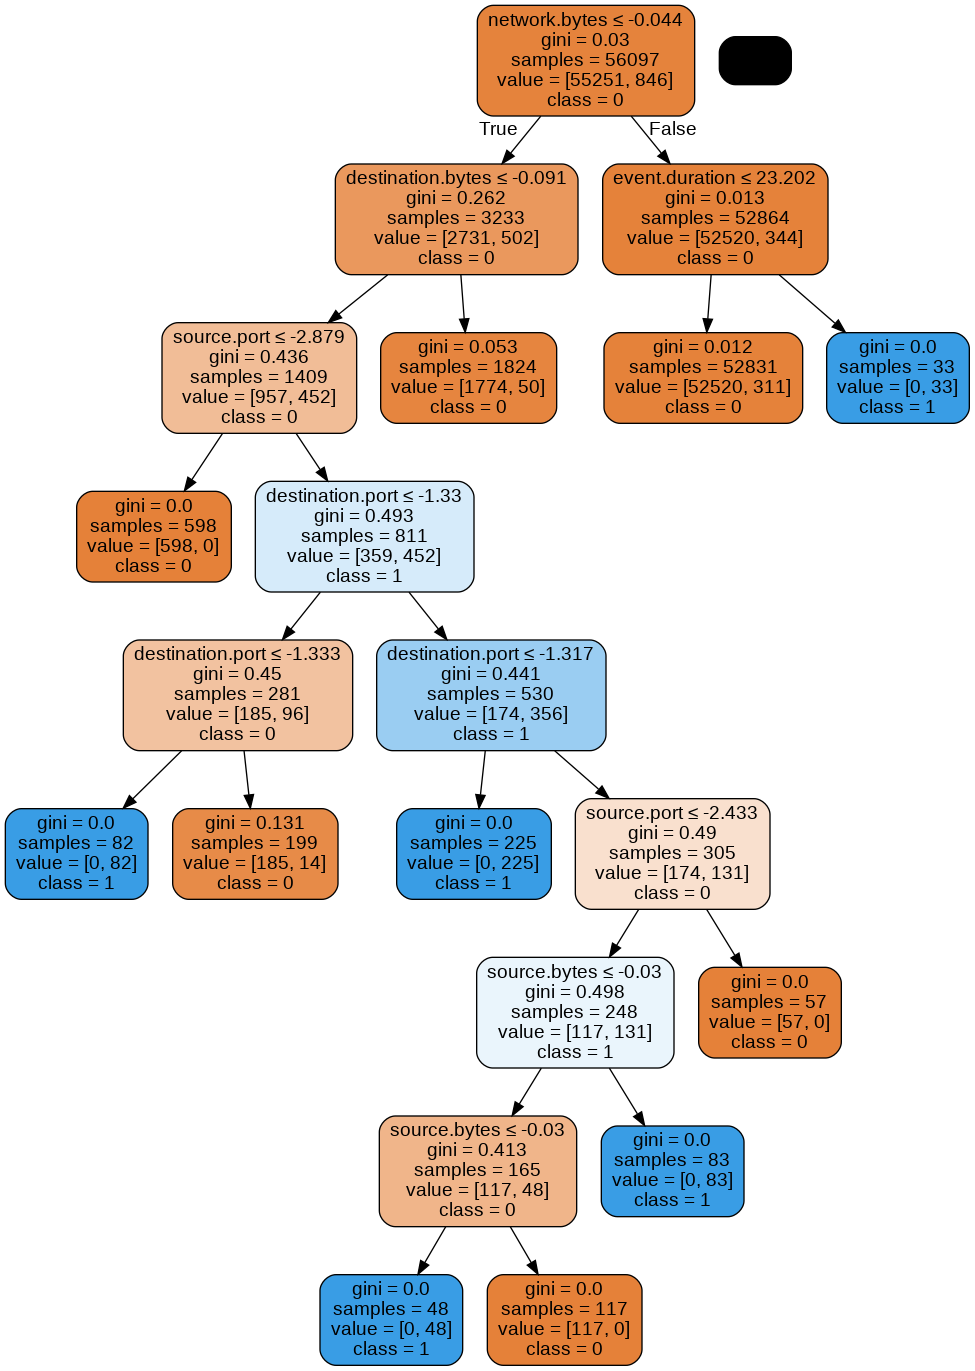

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree - T1595.png')
Image(graph.create_png())

# Support Vector Machine Algorithm

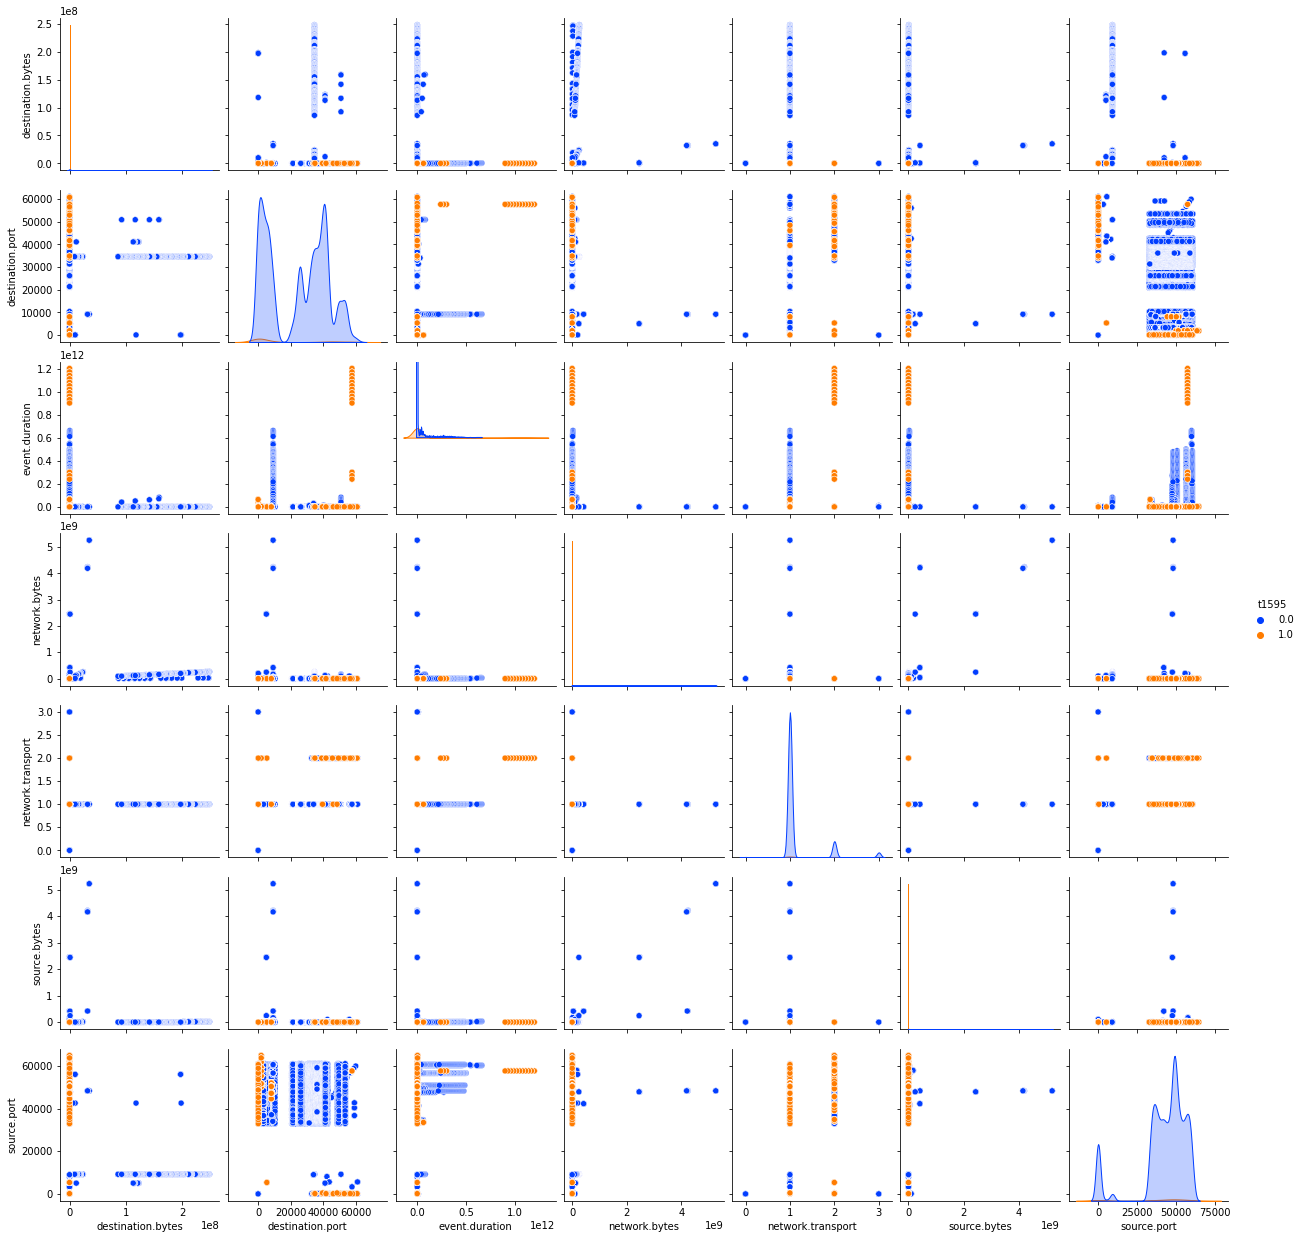

In [22]:
# Plotting all possible pairplots
sns.pairplot(df, hue='t1595', palette='bright')

In [ ]:
# Trying out 3D plots
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(df.iloc[:, 0], df.iloc[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [ ]:
# PCA Dimensional Reduction
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# SVM - RBF Kernel

In [26]:
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9845
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.0704


In [27]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9858
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.1488


In [28]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9861
Model accuracy score with default hyperparameters: 0.1664
Model accuracy score with default hyperparameters: 1.0000


# SVM - Linear Kernel

In [29]:
# instantiate classifier with linear kernel
lvc = svm.LinearSVC(C=1.0)

# fit classifier to training set
lvc.fit(X_train, y_train)

# make predictions on test set
y_pred = lvc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9840
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.0400


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [30]:
# instantiate classifier with linear kernel
lvc = svm.LinearSVC(C=100.0)

# fit classifier to training set
lvc.fit(X_train, y_train)

# make predictions on test set
y_pred = lvc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9833
Model accuracy score with default hyperparameters: 0.0000
Model accuracy score with default hyperparameters: 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# instantiate classifier with linear kernel
lvc = svm.LinearSVC(C=1000.0)

# fit classifier to training set
lvc.fit(X_train, y_train)

# make predictions on test set
y_pred = lvc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9833
Model accuracy score with default hyperparameters: 0.0000
Model accuracy score with default hyperparameters: 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM - Polynomial Kernel

In [32]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9841
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.0464


In [33]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=poly_svc100.predict(X_test)

## compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9848
Model accuracy score with default hyperparameters: 1.0000
Model accuracy score with default hyperparameters: 0.0928


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=1000.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
y_pred=poly_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

# SVM - Sigmoid Kernel

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 

# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=1000.0) 

# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))

# Optimizing SVM

In [23]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred)))
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9861
Model accuracy score with default hyperparameters: 0.1664
Model accuracy score with default hyperparameters: 1.0000


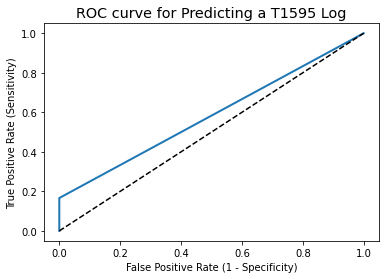

In [24]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a T1595 Log')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [25]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5832
